In [7]:
import pickle 
import numpy as np 
import pandas as pd 
import datapane as dp 
#from search_users import merge_df

profile = pickle.load(open('profile_df_extension', 'rb'))

len(profile)

1214

In [8]:
#Find percentage of missing values
profile.isnull().sum()/len(profile)

user_name       0.000000
name            0.134267
type_user       0.000000
html_url        0.000000
bio             0.528830
company         0.547776
email           0.551071
followers       0.000000
following       0.000000
hireable        0.701812
location        0.319605
created_at      0.000000
updated_at      0.000000
total_stars     0.081549
max_star        0.081549
forks           0.081549
languages       0.081549
descriptions    0.081549
dates           0.081549
contribution    0.000000
dtype: float64

In [9]:
def process_languages(dup_languages):
    
    languages = None
    try:
        languages = list(set(dup_languages))
        languages = [language for language in languages if language != None]
    except:
        pass
    
    return languages

In [10]:
def change_types(df):
    
    missing_columns = ['total_stars', 'max_star', 'forks']
    
    for col in missing_columns:
        df[col].fillna(0, inplace=True)
    
    convert_dict = {'followers': int,
               'following':int,
               'hireable': bool,
               'total_stars': int,
               'max_star': int,
               'forks': int,
                'contribution': int
                   }
    
    
    df = df.astype(convert_dict)
    
    
    
    return df
    

In [11]:
def process_df(df):
    df.languages = df.languages.apply(process_languages)
        
    df = change_types(df)
    
    #Remove duplicate
    df = df.iloc[list(df.iloc[:,:1].drop_duplicates().index),:]
    
    return df 

In [12]:
new_profile = process_df(profile)

In [7]:
new_profile.head(10)

user_name               name type_user  \
0    josephmisiti      Joseph Misiti     Owner   
1            wepe              wepon     Owner   
2         ZuzooVn             Nam Vu     Owner   
3           rasbt  Sebastian Raschka     Owner   
4  lazyprogrammer  LazyProgrammer.me     Owner   
5       lawlite19            lawlite     Owner   
6    Jack-Cherish           Jack Cui     Owner   
7      ujjwalkarn        Ujjwal Karn     Owner   
8        trekhleb   Oleksii Trekhleb     Owner   
9        Vay-keen             Wei Ao     Owner   

                            html_url  \
0    https://github.com/josephmisiti   
1            https://github.com/wepe   
2         https://github.com/ZuzooVn   
3           https://github.com/rasbt   
4  https://github.com/lazyprogrammer   
5       https://github.com/lawlite19   
6    https://github.com/Jack-Cherish   
7      https://github.com/ujjwalkarn   
8        https://github.com/trekhleb   
9        https://github.com/Vay-keen   

                                                 bio                  company  \
0        Mathematician & Co-founder of Math & Pencil           Math & Pencil    
1                                               None                   AntFin   
2  A Vietnamese Software Engineer who is really p...                     None   
3  Machine Learning researcher & open source cont...               UW-Madison   
4                    https://deeplearningcourses.com                     None   
5  It's really nice for us to meet each other in ...     Southeast University   
6                            :octocat:公众号：JackCui-AI  Northeastern University   
7                                               None                     None   
8                         Software Engineer at @uber                     Uber   
9                   Talk is cheap, show me the code!      Shenzhen University   

                        email  followers  following  hireable        location  \
0                        None       2486        273      True    Brooklyn, NY   
1            wepon@pku.edu.cn       4505         47     False  China Hangzhou   
2           zuzoovn@gmail.com       1188         91      True         Vietnam   
3   mail@sebastianraschka.com      12682         33     False     Madison, WI   
4                        None       2788          0     False            None   
5       lawlitewang@gmail.com        615         48      True  Nanjing, China   
6        c411184003@gmail.com       2885         28     False           China   
7                        None       1945        224     False            None   
8                        None       4904          7      True       Amsterdam   
9  aowei2016@email.szu.edu.cn        191          0     False          深圳市南山区   

             created_at            updated_at  total_stars  max_star  forks  \
0  2010-04-17T21:09:13Z  2020-06-18T19:43:56Z        46274     45164  11819   
1  2014-10-10T14:28:18Z  2020-06-15T14:01:30Z         7108      3803   5087   
2  2012-02-11T16:55:02Z  2020-06-11T19:42:17Z        23880     23875   5632   
3  2013-10-05T16:06:10Z  2020-06-23T15:56:31Z        47703     12636  15571   
4  2012-01-03T19:14:42Z  2020-06-27T21:40:43Z         5343      5169   4955   
5  2015-09-19T02:51:34Z  2020-06-28T15:19:19Z         3864      3075   2103   
6  2016-01-25T03:38:06Z  2020-05-12T13:55:41Z        15056     10823   7689   
7  2013-11-15T13:53:58Z  2020-05-16T17:36:08Z        16134     10395   5460   
8  2012-12-09T08:38:00Z  2020-05-09T06:04:58Z        96416     73804  16632   
9  2014-11-17T02:10:56Z  2020-03-13T12:18:55Z         4124      4072   1219   

                                           languages  \
0  [HTML, JavaScript, Objective-C, Java, CSS, She...   
1                   [HTML, Java, Shell, Python, C++]   
2                           [Java, JavaScript, HTML]   
3  [HTML, C, Python, R, Jupyter Notebook, OpenEdg...   
4                         [C#, Matlab, Ruby, Python]   
5  [HTML, JavaScript, Matl

In [13]:
new_profile[new_profile.user_name=='joeholler']

Empty DataFrame
Columns: [user_name, name, type_user, html_url, bio, company, email, followers, following, hireable, location, created_at, updated_at, total_stars, max_star, forks, languages, descriptions, dates, contribution]
Index: []

In [8]:
new_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1213
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_name     1208 non-null   object
 1   name          1045 non-null   object
 2   type_user     1208 non-null   object
 3   html_url      1208 non-null   object
 4   bio           567 non-null    object
 5   company       545 non-null    object
 6   email         540 non-null    object
 7   followers     1208 non-null   int64 
 8   following     1208 non-null   int64 
 9   hireable      1208 non-null   bool  
 10  location      822 non-null    object
 11  created_at    1208 non-null   object
 12  updated_at    1208 non-null   object
 13  total_stars   1208 non-null   int64 
 14  max_star      1208 non-null   int64 
 15  forks         1208 non-null   int64 
 16  languages     1109 non-null   object
 17  descriptions  1109 non-null   object
 18  dates         1109 non-null   object
 19  contri

In [9]:
new_profile.to_csv('new_profile.csv')

# Visualization

In [10]:
import altair as alt 
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import plotly.express as px


In [12]:
top_followers = new_profile.sort_values(by='followers', axis=0, ascending=False)

In [13]:
sum(top_followers.iloc[0:12,:].loc[:, 'followers'])/sum(top_followers.followers)

0.41293075864408607

In [14]:
int(len(top_followers) * 0.01)

12

In [15]:
#layout = Layout(
#    plot_bgcolor='rgba(0,0,0,0)'
#)


fig = px.bar(top_followers, 
             x='user_name', 
             y='followers',
             hover_data=['followers'],
            )

fig.update_layout({'plot_bgcolor': 'rgba(36, 83, 97, 0.06)'}) #Change background color


fig.show()

In [184]:
dp.Report(dp.Plot(fig)).publish(name='followers')

12:10:02 [INFO ] Uploading assets for Report
12:10:03 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-zoc10mvn.pl.json
12:10:04 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/followers_f9556855/


In [185]:
top_stars = new_profile.sort_values(by='total_stars', axis=0, ascending=False)

In [17]:
fig = px.bar(top_stars, 
             x='user_name', 
             y='total_stars',
             hover_data=['total_stars'],
             color = 'total_stars'
            )
fig.show()

In [15]:
features = ['followers',
               'following',
               'total_stars',
               'max_star',
               'forks',
           'contribution']
figs = []
for col in features:
    top_col = new_profile.sort_values(by=col, axis=0, ascending=False)
    
    log_y = False
    
    # #change scale of y-axis of every feature to log except contribution
    if col != 'contribution':
        log_y = True
    
    fig = px.bar(top_col,
             x='user_name', 
             y=col,
             hover_data=[col],
            log_y=log_y, 
            )
    
    fig.update_layout({'plot_bgcolor': 'rgba(36, 83, 97, 0.06)'})
    
    fig.show()
    fig = dp.Plot(fig)
    figs.append(fig)



In [187]:
dp.Report(*figs).publish(name='features')

12:12:37 [INFO ] Uploading assets for Report
12:12:38 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-mhmcyahx.pl.json
12:12:39 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-llvle67v.pl.json
12:12:40 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-eeu4y2fy.pl.json
12:12:41 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-wkq73hwp.pl.json
12:12:42 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-ylb3605g.pl.json
12:12:43 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-cpvovx0d.pl.json
12:12:44 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/features_99dd6dfd/


In [16]:
correlation = px.scatter_matrix(new_profile, dimensions=['forks', 'total_stars', 'followers',
                                 'following', 'max_star','contribution'],
                               title='Correlation between datapoints',
                               width=800, height=800)

correlation.show()

figs.append(dp.Plot(correlation))

In [72]:
dp.Report(dp.Plot(correlation)).publish(name='correlation_plot')

09:24:08 [INFO ] Uploading assets for Report
09:24:08 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-ztaa0s17.pl.json
09:24:10 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/correlation_plot/


In [17]:
corr = new_profile.corr()
figs.append(dp.Table(corr))

In [71]:
dp.Report(dp.Table(corr)).publish(name='correlation')

09:23:19 [INFO ] Uploading assets for Report
09:23:19 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-udir2xlc.arrow
09:23:21 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/correlation_2e26a914/


In [18]:
languages = []
for language in list(new_profile['languages']):
    try:
        languages += language
    except:
        languages += ['None'] 
    


In [19]:
from collections import Counter 

occ = dict(Counter(languages))
occ 

{'HTML': 535,
 'JavaScript': 575,
 'Objective-C': 65,
 'Java': 335,
 'CSS': 329,
 'Shell': 335,
 'Python': 789,
 'Go': 133,
 'Ruby': 161,
 'Makefile': 49,
 'R': 108,
 'C++': 307,
 'C': 244,
 'Jupyter Notebook': 396,
 'OpenEdge ABL': 5,
 'C#': 95,
 'Matlab': 103,
 'TypeScript': 98,
 'MATLAB': 13,
 'Roff': 8,
 'TeX': 138,
 'Vue': 31,
 'Vim script': 63,
 'Cuda': 15,
 'Dart': 16,
 'Lua': 38,
 'Scala': 66,
 'Dockerfile': 72,
 'PHP': 139,
 'Perl': 32,
 'Rust': 50,
 'Haskell': 37,
 'Elm': 12,
 'Nix': 3,
 'CoffeeScript': 28,
 'Batchfile': 8,
 'ASP': 5,
 'Visual Basic': 8,
 'Tcl': 4,
 'Smarty': 3,
 'AutoHotkey': 7,
 'Swift': 45,
 'ActionScript': 3,
 'Prolog': 8,
 'Common Lisp': 9,
 'Reason': 1,
 'OCaml': 8,
 'None': 99,
 'Julia': 15,
 'VimL': 50,
 'Groovy': 7,
 'PowerShell': 15,
 'Assembly': 22,
 'VHDL': 8,
 'TSQL': 5,
 'Processing': 6,
 'Arduino': 20,
 'M': 2,
 'Elixir': 19,
 'Nginx': 3,
 'ApacheConf': 7,
 'Groff': 5,
 'Brainfuck': 2,
 'Kotlin': 16,
 'Apex': 1,
 'SuperCollider': 3,
 'Objective

In [20]:
top_languages = [(language, frequency) for language, frequency in occ.items() if frequency > 10]

top_languages = list(zip(*top_languages))

language_df = pd.DataFrame(data = {'languages': top_languages[0],
                           'frequency': top_languages[1]})

#language_df.loc[language_df['frequency'] < 30, 'languages'] = 'Other languages'

language_df.sort_values(by='frequency', axis=0, inplace=True, ascending=False)

language = px.bar(language_df, y='frequency', x='languages',
      title='Frequency of languages')

figs.append(dp.Plot(language))

In [41]:
dp.Report(dp.Plot(language)).publish(name='languages')

20:49:01 [INFO ] Uploading assets for Report
20:49:01 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-6s78t07l.pl.json
20:49:02 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/languages_bd7dec40/


In [73]:
language.show()

In [129]:
dp.Report(dp.Plot(language)).publish(name='languages', visibility='PUBLIC')

09:36:48 [INFO ] Uploading assets for Report
09:36:49 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-fcj6hu42.pl.json
09:36:50 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/languages_5a9a5fe5/


In [23]:
import altair as alt

hireable = alt.Chart(new_profile).transform_aggregate(
    count='count()',
    groupby=['hireable']
).mark_bar().encode(
    x='hireable:O',
    y='count:Q')

figs.append(dp.Plot(hireable))

In [57]:
dp.Report(dp.Plot(hireable)).publish(name='hireable', visibiliy='PUBLIC')

17:10:00 [INFO ] Uploading assets for Report
17:10:00 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-ho5y21f9/dp-tmp-iqkix1fa.vl.json
17:10:04 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/hireable/


In [196]:
dates = []
for date in new_profile['dates']:
    try:
        dates += date
    except: 
        pass 
dates 

['2017-01-09T05:56:49Z',
 '2015-04-08T03:18:50Z',
 '2018-05-12T21:32:14Z',
 '2020-06-28T19:46:23Z',
 '2019-10-31T01:50:51Z',
 '2019-03-13T17:49:43Z',
 '2014-05-03T02:46:27Z',
 '2016-08-22T08:37:15Z',
 '2015-08-21T01:40:07Z',
 '2014-02-12T22:39:41Z',
 '2014-04-27T08:59:18Z',
 '2015-09-25T01:09:36Z',
 '2015-01-07T00:28:21Z',
 '2015-10-02T20:13:00Z',
 '2020-01-05T05:57:46Z',
 '2013-10-07T17:52:51Z',
 '2014-05-05T08:01:46Z',
 '2013-12-29T02:19:39Z',
 '2014-05-02T20:27:48Z',
 '2020-06-18T16:37:26Z',
 '2019-05-02T03:22:05Z',
 '2020-05-04T21:53:32Z',
 '2014-06-13T17:29:08Z',
 '2018-04-23T12:28:02Z',
 '2020-04-09T19:49:44Z',
 '2013-11-05T05:06:03Z',
 '2014-02-11T06:10:32Z',
 '2019-02-27T15:11:35Z',
 '2013-04-04T03:59:43Z',
 '2020-01-14T14:57:10Z',
 '2019-11-02T02:12:27Z',
 '2015-02-22T03:08:22Z',
 '2019-11-02T02:12:30Z',
 '2018-12-05T16:43:51Z',
 '2020-03-05T18:56:53Z',
 '2015-11-20T16:15:08Z',
 '2020-06-26T21:31:41Z',
 '2015-09-25T13:45:16Z',
 '2018-01-08T04:21:58Z',
 '2015-10-20T22:46:19Z',


In [59]:
dates_df = pd.DataFrame({'dates':dates})

In [60]:
pd.to_datetime(dates_df['dates']).dt.date

0        2017-01-09
1        2015-04-08
2        2018-05-12
3        2020-06-28
4        2019-10-31
            ...    
25755    2017-03-11
25756    2017-03-09
25757    2017-03-18
25758    2018-04-24
25759    2017-12-20
Name: dates, Length: 25760, dtype: object

In [61]:
dates_df['month_year'] = pd.to_datetime(dates_df['dates']).dt.to_period('M') 

/home/khuyentran/anaconda3/envs/scraping/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [62]:
months = dict(Counter(list(dates_df['month_year'])))
month_df = pd.DataFrame({'month': list(months.keys()),
                        'frequency': list(months.values())})

In [63]:
month_df

month  frequency
0   2017-01        230
1   2015-04        216
2   2018-05        289
3   2020-06       2450
4   2019-10        491
..      ...        ...
86  2013-09         61
87  2014-12        155
88  2013-07          9
89  2013-03          5
90  2013-08         12

[91 rows x 2 columns]

In [64]:
month_df['ym'] = month_df.month.values.astype('datetime64[M]')

In [65]:
pivot = month_df.groupby(month_df['ym'])['frequency'].sum().sort_values()

In [97]:
pivot = pd.DataFrame(pivot).reset_index()
pivot

index         ym  frequency
0       0 2013-03-01          5
1       1 2013-02-01          8
2       2 2012-12-01          9
3       3 2013-07-01          9
4       4 2013-08-01         12
..    ...        ...        ...
86     86 2020-01-01        651
87     87 2020-03-01        662
88     88 2020-04-01        804
89     89 2020-05-01       1357
90     90 2020-06-01       2450

[91 rows x 3 columns]

In [67]:
fig = px.bar(pivot, x='ym', y='frequency', title='Update Activity of Popular Repos')
figs.append(dp.Plot(fig))

In [68]:
new_profile

user_name               name    type_user  \
0       josephmisiti      Joseph Misiti        Owner   
1               wepe              wepon        Owner   
2            ZuzooVn             Nam Vu        Owner   
3              rasbt  Sebastian Raschka        Owner   
4     lazyprogrammer  LazyProgrammer.me        Owner   
...              ...                ...          ...   
1209       aggronerd      Gregory Doran  Contributor   
1210        sdierauf     Stefan Dierauf  Contributor   
1211        fleeting     James Fleeting  Contributor   
1212    LiberiFatali               None  Contributor   
1213  Zzlongjuanfeng       zengxianfang  Contributor   

                               html_url  \
0       https://github.com/josephmisiti   
1               https://github.com/wepe   
2            https://github.com/ZuzooVn   
3              https://github.com/rasbt   
4     https://github.com/lazyprogrammer   
...                                 ...   
1209       https://github.com/aggronerd   
1210        https://github.com/sdierauf   
1211        https://github.com/fleeting   
1212    https://github.com/LiberiFatali   
1213  https://github.com/Zzlongjuanfeng   

                                                    bio              company  \
0           Mathematician & Co-founder of Math & Pencil       Math & Pencil    
1                                                  None               AntFin   
2     A Vietnamese Software Engineer who is really p...                 None   
3     Machine Learning researcher & open source cont...           UW-Madison   
4                       https://deeplearningcourses.com                 None   
...                                                 ...                  ...   
1209                                               None                 None   
1210                                            Android              @google   
1211  Not an astronaut. Former superhero. Current fr...         @Monkee-Boy    
1212                                  le petit explorer                 None   
1213                                               None  zhejiang university   

                          email  followers  following  hireable  \
0                          None       2486        273      True   
1              wepon@pku.edu.cn       4505         47     False   
2             zuzoovn@gmail.com       1188         91      True   
3     mail@sebastianraschka.com      12682         33     False   
4                          None       2788          0     False   
...                         ...        ...        ...       ...   
1209                       None          1          3      True   
1210         sdierauf@gmail.com         59         61     False   
1211  twofivethreetwo@gmail.com         93        215     False   
1212                       None         10          0      True   
1213  zzlongjuanfeng@zju.edu.cn         16         13     False   

            location            created_at            updated_at  total_stars  \
0       Brooklyn, NY  2010-04-17T21:09:13Z  2020-06-18T19:43:56Z        46274   
1     China Hangzhou  2014-10-10T14:28:18Z  2020-06-15T14:01:30Z         7108   
2            Vietnam  2012-02-11T16:55:02Z  2020-06-11T19:42:17Z        23880   
3        Madison, WI  2013-10-05T16:06:10Z  2020-06-23T15:56:31Z        47703   
4               None  2012-01-03T19:14:42Z  2020-06-27T21:40:43Z         5343   
...              ...                   ...                   ...          ...   
1209  United Kingdom  2011-09-07T22:08:59Z  2020-06-18T22:57:25Z            6   
1210  Google Seattle  2012-11-22T07:37:55Z  2020-05-14T01:41:38Z           13   
1211      Austin, TX  2008-09-03T20:46:43Z  2020-06-15T15:18:51Z           32   
1212         Vietnam  2012-11-12T06:43:17Z  2020-06-16T07:08:53Z            7   
1213        hangzhou  2016-04-18T07:00:43Z  2020-06-09T14:50:56Z            1   

      max_star  forks                                          languages  \
0     

In [24]:
from geopy.geocoders import Nominatim
import folium

address= 'Austin, TX'
geolocator = Nominatim(user_agent="khuyentran1401")
location = geolocator.geocode(address)
print(location.address)
print((location.latitude, location.longitude))

m = folium.Map(location=[location.latitude, location.longitude])


Austin, Travis County, Texas, United States of America
(30.2711286, -97.7436995)


In [76]:
locations = list(new_profile['location'])

In [26]:
location_df = pickle.load(open('location_df', 'rb'))

In [ ]:
lats = []
lons = []
exceptions = []

for loc in locations:
    try:
        location = geolocator.geocode(loc)
        lats.append(location.latitude)
        lons.append(location.longitude)
        print(location.address)
    except:
        print('exception', loc)
        exceptions.append(loc)

Brooklyn, New York, Kings County, New York, United States of America
杭州市, 浙江省, China 中国
Việt Nam
Madison, Dane County, Wisconsin, United States of America
None, Provincia di Torino, Piemonte, Italia
南京市, 江苏省, China 中国
中国
None, Provincia di Torino, Piemonte, Italia
Amsterdam, Noord-Holland, Nederland
南山区, 深圳市, 广东省, 518000, China 中国
Portland, Multnomah County, Oregon, United States of America
Toronto, Golden Horseshoe, Ontario, M5H 2N2, Canada
None, Provincia di Torino, Piemonte, Italia
Pittsburgh, Allegheny County, Pennsylvania, United States of America
北京市, 东城区, 北京市, 100010, China 中国
exception Amsterdam
北京大学, 颐和园路, 稻香园南社区, 万柳地区, 海淀区, 北京市, 10080, China 中国
深圳市, 广东省, China 中国
None, Provincia di Torino, Piemonte, Italia
Boston, Suffolk County, Massachusetts, United States of America
None, Provincia di Torino, Piemonte, Italia
Brooklyn, New York, Kings County, New York, United States of America
Sydney, New South Wales, Australia
Amsterdam, Noord-Holland, Nederland
Cambridge, Cambridgeshire,

In [157]:
exceptions

['SF Bay Area, USA',
 'In an off-grid driverless van',
 '~',
 '/dev/tcp/127.0.0.1/443',
 'mars.localhost:2027',
 'NYC, Earth, Milky Way',
 'Granada, Spain, Europe',
 '~/',
 ' BUPT @ Beijing, Guangzhou, Shanghai',
 'Third planet from the sun...',
 '三重or名古屋',
 'High dimensional abstract space',
 'Mountain View, CA / St. Louis, MO',
 'San Diego, CA - Stockholm, Sweden',
 'Somewhere, Universe',
 'Haidian Dist, Beijing, China',
 '0x7ffffffeffff']

In [74]:
location_df = new_profile[~new_profile.location.isin(exceptions)]

NameError: name 'exceptions' is not defined

In [41]:
location_df['latitude'] = lats
location_df['longitude'] = lons

<ipython-input-41-13c4882d58a6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-13c4882d58a6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
location_df
pickle.dump(location_df,open('location_df','wb'))

In [133]:
px.set_mapbox_access_token('pk.eyJ1Ijoia2h1eWVudHJhbjE0MDEiLCJhIjoiY2tjM3BiZG5kMDA1MzJzcXNqNzV0dnIwOCJ9.fa4Zaso75AnRZQn8iDTieg')


In [134]:
m = px.scatter_mapbox(location_df, lat='latitude', lon='longitude',
                 color='total_stars', size='forks',
                 hover_data=['user_name','followers'],
                 title='Locations of Top Users')
figs.append(dp.Plot(m))

In [27]:
m = px.scatter_geo(location_df, lat='latitude', lon='longitude',
                 color='total_stars', size='forks',
                 hover_data=['user_name','followers'],
                 title='Locations of Top Users')

In [28]:
figs.append(dp.Plot(m))

In [140]:
dp.Report(dp.Plot(m)).publish(name='locations')

09:45:08 [INFO ] Uploading assets for Report
09:45:08 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-p9fo82ju/dp-tmp-olmj0f5y.pl.json
09:45:09 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/locations_4dc3c34f/


In [29]:

descriptions = []
for desc in new_profile['descriptions']:
    try:
        descriptions += desc
        
    except:
        pass

In [30]:
descriptions = [desc for desc in descriptions if desc != None]

In [31]:
text = ' '.join(descriptions)

In [32]:
type(text)
import nltk

In [81]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/khuyentran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/khuyentran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/khuyentran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


# lowercase
text = text.lower()

#remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
stop_words = set(stopwords.words('english'))

#tokenize
tokens = word_tokenize(text)
new_text = [i for i in tokens if not i in stop_words]





In [34]:
new_text = ' '.join(new_text)

In [59]:
!pip install wordcloud


     |████████████████████████████████| 216 kB 3.3 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.7.0-cp38-cp38-linux_x86_64.whl size=487430 sha256=7c47232be528cf67f8a503588b4e987b1270d29e6d6534c23eed7aa64b8ca9e8
  Stored in directory: /home/khuyentran/.cache/pip/wheels/e0/38/00/528d35b61734cf027cbe8c747c441dde83c4454d8a1293ce32
Successfully built wordcloud


In [35]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

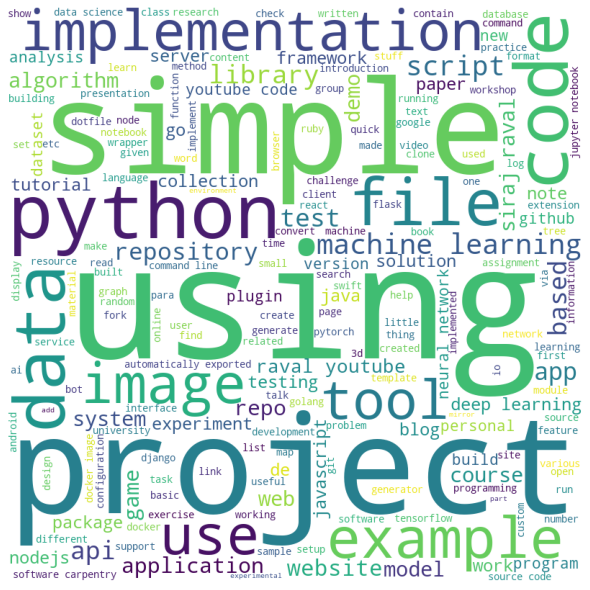

In [36]:
import matplotlib.pyplot as plt

# plot the WordCloud image                        
fig = plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

figs.append(dp.Plot(fig))

In [95]:
dp.Report(dp.Plot(fig)).publish('descriptions')

17:38:04 [INFO ] Uploading assets for Report
17:38:05 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-ho5y21f9/dp-tmp-pv03l65m.svg
17:38:07 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/descriptions/


In [37]:
def process_text(features):
    
    features = [row for row in features if row != None]
    
    text = ' '.join(features)
    
    
    
    # lowercase
    text = text.lower()

    #remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    #remove stopwords
    stop_words = set(stopwords.words('english'))

    #tokenize
    tokens = word_tokenize(text)
    new_text = [i for i in tokens if not i in stop_words]
    
    new_text = ' '.join(new_text)
    
    return new_text

def make_wordcloud(new_text):
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig
    

In [38]:
bios = []
for bio in new_profile['bio']:
    try:
        bios.append(bio)
        
    except:
        pass

In [169]:
bios

['Mathematician & Co-founder of Math & Pencil',
 None,
 'A Vietnamese Software Engineer who is really passionate and wants to work in the USA',
 'Machine Learning researcher & open source contributor. Author of "Python Machine Learning." Asst. Prof. of Statistics @ UW-Madison.',
 'https://deeplearningcourses.com',
 "It's really nice for us to meet each other in such a big world.",
 ':octocat:公众号：JackCui-AI',
 None,
 'Software Engineer at @uber',
 'Talk is cheap, show me the code!',
 'Independent software developer in Portland, OR. 8+ years experience, 4+ years remote/WFH. Available for part-time and week(s)-long gigs (data eng, SDET, DevOps)',
 'Sr. Data Scientist',
 'Ecole Centrale Paris, MIT',
 "SCS'18 Deep Learning @CarnegieMellonUniversity\r\n\r\n\r\n",
 'Researcher at Microsoft Research. Research interest: transfer learning.',
 'Senior Machine Learning Scientist, NLP researcher @ Elsevier, Amsterdam',
 '一个啥都想学的浮莲子',
 'Machine learning enthusiast.',
 None,
 'CV + CG + ML',
 '机器学习小学

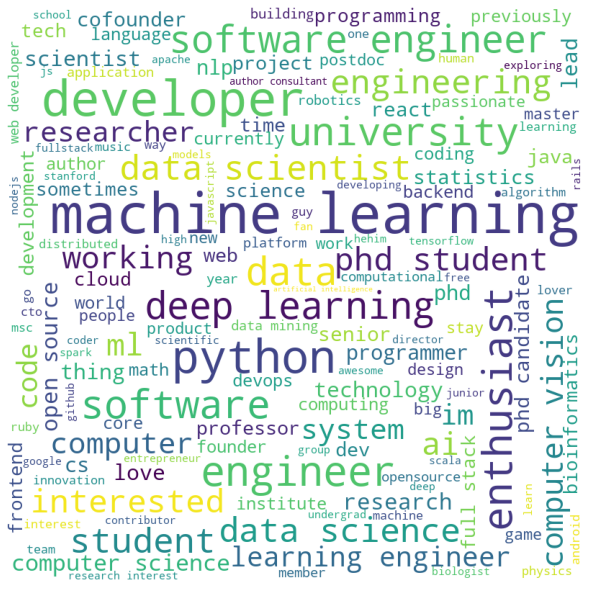

In [39]:
text = process_text(bios)

cloud = make_wordcloud(text)

figs.append(dp.Plot(cloud))

In [105]:
new_profile

user_name               name    type_user  \
0       josephmisiti      Joseph Misiti        Owner   
1               wepe              wepon        Owner   
2            ZuzooVn             Nam Vu        Owner   
3              rasbt  Sebastian Raschka        Owner   
4     lazyprogrammer  LazyProgrammer.me        Owner   
...              ...                ...          ...   
1209       aggronerd      Gregory Doran  Contributor   
1210        sdierauf     Stefan Dierauf  Contributor   
1211        fleeting     James Fleeting  Contributor   
1212    LiberiFatali               None  Contributor   
1213  Zzlongjuanfeng       zengxianfang  Contributor   

                               html_url  \
0       https://github.com/josephmisiti   
1               https://github.com/wepe   
2            https://github.com/ZuzooVn   
3              https://github.com/rasbt   
4     https://github.com/lazyprogrammer   
...                                 ...   
1209       https://github.com/aggronerd   
1210        https://github.com/sdierauf   
1211        https://github.com/fleeting   
1212    https://github.com/LiberiFatali   
1213  https://github.com/Zzlongjuanfeng   

                                                    bio              company  \
0           Mathematician & Co-founder of Math & Pencil       Math & Pencil    
1                                                  None               AntFin   
2     A Vietnamese Software Engineer who is really p...                 None   
3     Machine Learning researcher & open source cont...           UW-Madison   
4                       https://deeplearningcourses.com                 None   
...                                                 ...                  ...   
1209                                               None                 None   
1210                                            Android              @google   
1211  Not an astronaut. Former superhero. Current fr...         @Monkee-Boy    
1212                                  le petit explorer                 None   
1213                                               None  zhejiang university   

                          email  followers  following  hireable  \
0                          None       2486        273      True   
1              wepon@pku.edu.cn       4505         47     False   
2             zuzoovn@gmail.com       1188         91      True   
3     mail@sebastianraschka.com      12682         33     False   
4                          None       2788          0     False   
...                         ...        ...        ...       ...   
1209                       None          1          3      True   
1210         sdierauf@gmail.com         59         61     False   
1211  twofivethreetwo@gmail.com         93        215     False   
1212                       None         10          0      True   
1213  zzlongjuanfeng@zju.edu.cn         16         13     False   

            location            created_at            updated_at  total_stars  \
0       Brooklyn, NY  2010-04-17T21:09:13Z  2020-06-18T19:43:56Z        46274   
1     China Hangzhou  2014-10-10T14:28:18Z  2020-06-15T14:01:30Z         7108   
2            Vietnam  2012-02-11T16:55:02Z  2020-06-11T19:42:17Z        23880   
3        Madison, WI  2013-10-05T16:06:10Z  2020-06-23T15:56:31Z        47703   
4               None  2012-01-03T19:14:42Z  2020-06-27T21:40:43Z         5343   
...              ...                   ...                   ...          ...   
1209  United Kingdom  2011-09-07T22:08:59Z  2020-06-18T22:57:25Z            6   
1210  Google Seattle  2012-11-22T07:37:55Z  2020-05-14T01:41:38Z           13   
1211      Austin, TX  2008-09-03T20:46:43Z  2020-06-15T15:18:51Z           32   
1212         Vietnam  2012-11-12T06:43:17Z  2020-06-16T07:08:53Z            7   
1213        hangzhou  2016-04-18T07:00:43Z  2020-06-09T14:50:56Z            1   

      max_star  forks                                          languages  \
0     

In [40]:
dp.Report(*figs).publish(name='finding')

20:46:38 [INFO ] Uploading assets for Report
20:46:38 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-u5ugv5j8.pl.json
20:46:40 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-sbbpkxaq.pl.json
20:46:41 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-477s35u8.pl.json
20:46:43 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-coeqy04j.pl.json
20:46:44 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-w_k28erl.pl.json
20:46:45 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-yb3hq835.pl.json
20:46:46 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-b4u8gudc/dp-tmp-z4hcjtig.pl.json
20:46:47 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-

In [2]:
import base64
encoded= 'I1Byb2plY3QgMDogUG9uZwoKIyNQcm9qZWN0IGRlc2NyaXB0aW9uCgojIyNQ\ncm9qZWN0IE92ZXJ2aWV3CgpJbiB0aGlzIHByb2plY3QsIHlvdSB3aWxsIHdy\naXRlIGNvZGUgdG8gY29tcGxldGUgdGhlIGNsYXNzaWMgYXJjYWRlIGdhbWUs'
data = base64.b64decode(encoded)
data

b'#Project 0: Pong\n\n##Project description\n\n###Project Overview\n\nIn this project, you will write code to complete the classic arcade game,'

In [5]:
import datapane as dp 

df = dp.Blob.get('profile').download_df()
df 

user_name               name    type_user  \
0       josephmisiti      Joseph Misiti        Owner   
1               wepe              wepon        Owner   
2            ZuzooVn             Nam Vu        Owner   
3              rasbt  Sebastian Raschka        Owner   
4     lazyprogrammer  LazyProgrammer.me        Owner   
...              ...                ...          ...   
1209       aggronerd      Gregory Doran  Contributor   
1210        sdierauf     Stefan Dierauf  Contributor   
1211        fleeting     James Fleeting  Contributor   
1212    LiberiFatali               None  Contributor   
1213  Zzlongjuanfeng       zengxianfang  Contributor   

                               html_url  \
0       https://github.com/josephmisiti   
1               https://github.com/wepe   
2            https://github.com/ZuzooVn   
3              https://github.com/rasbt   
4     https://github.com/lazyprogrammer   
...                                 ...   
1209       https://github.com/aggronerd   
1210        https://github.com/sdierauf   
1211        https://github.com/fleeting   
1212    https://github.com/LiberiFatali   
1213  https://github.com/Zzlongjuanfeng   

                                                    bio              company  \
0           Mathematician & Co-founder of Math & Pencil       Math & Pencil    
1                                                  None               AntFin   
2     A Vietnamese Software Engineer who is really p...                 None   
3     Machine Learning researcher & open source cont...           UW-Madison   
4                       https://deeplearningcourses.com                 None   
...                                                 ...                  ...   
1209                                               None                 None   
1210                                            Android              @google   
1211  Not an astronaut. Former superhero. Current fr...         @Monkee-Boy    
1212                                  le petit explorer                 None   
1213                                               None  zhejiang university   

                          email                     followers  \
0                          None 1970-01-01 00:00:00.000002486   
1              wepon@pku.edu.cn 1970-01-01 00:00:00.000004505   
2             zuzoovn@gmail.com 1970-01-01 00:00:00.000001188   
3     mail@sebastianraschka.com 1970-01-01 00:00:00.000012682   
4                          None 1970-01-01 00:00:00.000002788   
...                         ...                           ...   
1209                       None 1970-01-01 00:00:00.000000001   
1210         sdierauf@gmail.com 1970-01-01 00:00:00.000000059   
1211  twofivethreetwo@gmail.com 1970-01-01 00:00:00.000000093   
1212                       None 1970-01-01 00:00:00.000000010   
1213  zzlongjuanfeng@zju.edu.cn 1970-01-01 00:00:00.000000016   

                         following hireable        location  \
0    1970-01-01 00:00:00.000000273     True    Brooklyn, NY   
1    1970-01-01 00:00:00.000000047      NaN  China Hangzhou   
2    1970-01-01 00:00:00.000000091     True         Vietnam   
3    1970-01-01 00:00:00.000000033      NaN     Madison, WI   
4    1970-01-01 00:00:00.000000000      NaN            None   
...                            ...      ...             ...   
1209 1970-01-01 00:00:00.000000003     True  United Kingdom   
1210 1970-01-01 00:00:00.000000061      NaN  Google Seattle   
1211 1970-01-01 00:00:00.000000215      NaN      Austin, TX   
1212 1970-01-01 00:00:00.000000000     True         Vietnam   
1213 1970-01-01 00:00:00.000000013      NaN        hangzhou   

              created_at          updated_at                   total_stars  \
0    2010-04-17 21:09:13 2020-06-18 19:43:56 1970-01-01 00:00:00.000046274   
1    2014-10-10 14:28:18 2020-06-15 14:01:30 1970-01-01 00:00:00.000007108   
2    2012-02-11 16:55:02 2020-06-11 19:42:17 1970-01-01 00:00:00.000023880   
3    2013-

In [6]:
dp.Report(dp.Table(df)).publish(name='github_findings', visibility='PUBLIC')

15:02:28 [INFO ] Uploading assets for Report
15:02:29 [INFO ] Uploading /home/khuyentran/EPS-Y/scrape_github/gitscrapy/gitscrapy/dp-tmp-v2eprull/dp-tmp-o59kydgm.arrow
15:02:31 [INFO ] Report published to Datapane as https://datapane.com/khuyentran1401/reports/github_findings/
